# # Análisis de Clientes con Clustering Jerárquico
# Dataset: Mall_Customers.csv

In [1]:
# 1. Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

In [2]:
# 2. Cargar datos
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
        CustomerID  Gender         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000     

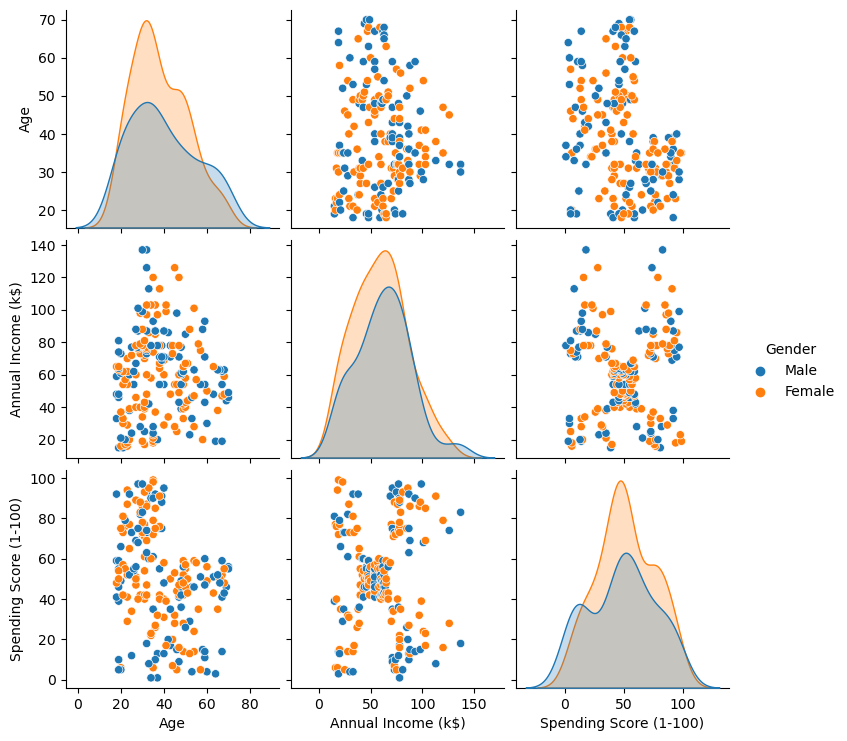

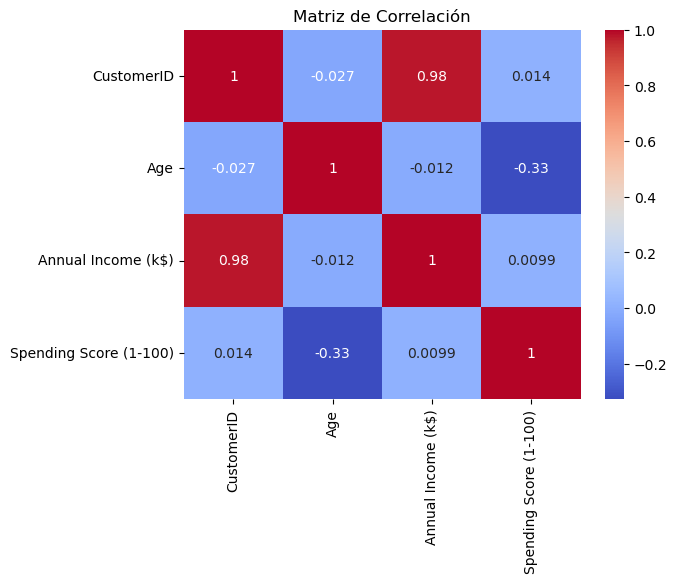

In [3]:
# 3. Exploración básica
print(df.info())
print(df.describe(include='all'))
sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender")
plt.show()

# Correlaciones
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

In [4]:
# 4. Limpieza y preprocesamiento
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df_clean = df.drop("CustomerID", axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

In [5]:
# 5. Selección visual de características (podríamos aplicar reducción PCA si fuera necesario)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

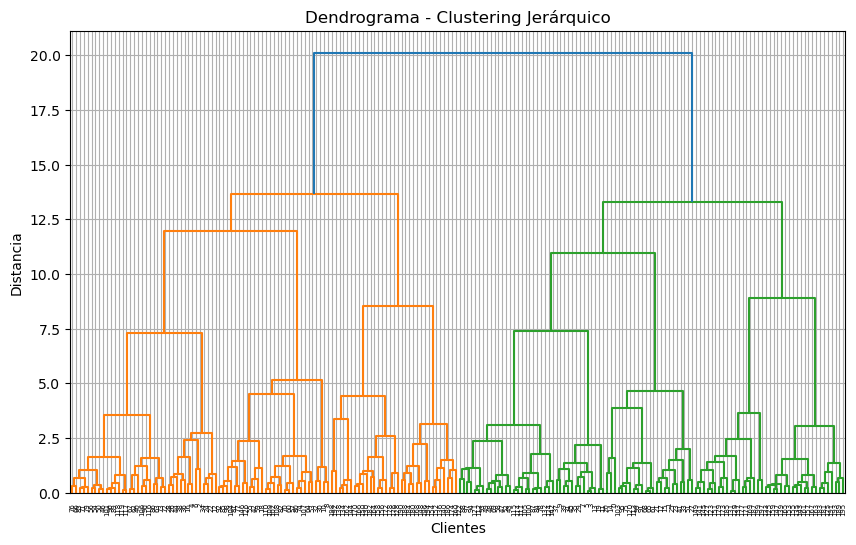

In [6]:
# 6. dendrograma para el número de clusters
plt.figure(figsize=(10, 6))
linked = linkage(scaled_data, method='ward')
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()

In [7]:
# 7. clusters jerárquicos a partir del dendrograma
k_optimo = 5
clusters = fcluster(linked, k_optimo, criterion='maxclust')
df['Cluster'] = clusters

In [8]:
# 8. Evaluación del modelo
silhouette = silhouette_score(scaled_data, df['Cluster'])
calinski = calinski_harabasz_score(scaled_data, df['Cluster'])

print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.2f}")

Coeficiente de Silhouette: 0.287
Índice de Calinski-Harabasz: 64.47


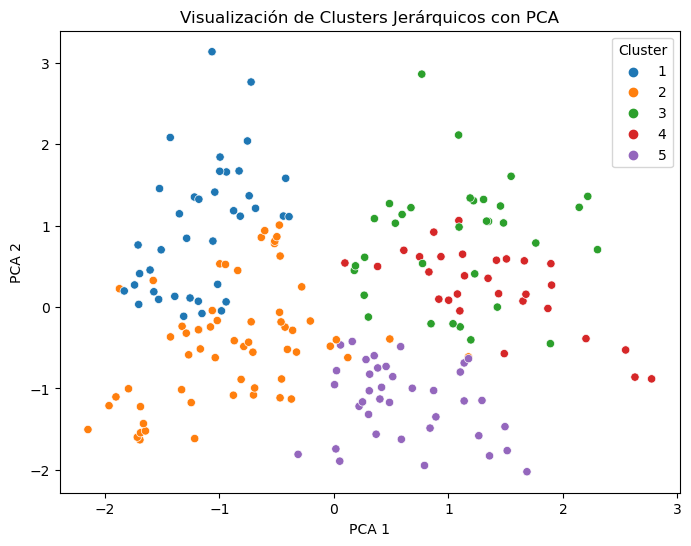

In [9]:
# 9. Visualización de clusters jerárquicos con PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df['Cluster'], palette='tab10')
plt.title('Visualización de Clusters Jerárquicos con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [10]:
# 10. Análisis por grupo
df.groupby('Cluster').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,62.409836,0.377049,26.147541,43.770492,58.967213
3,166.090909,0.545455,41.454545,89.090909,16.181818
4,74.758621,1.000000,56.551724,50.034483,41.344828
5,61.210526,0.000000,49.789474,44.105263,39.657895
